# Ekplorasi Data

In [15]:
import yfinance as yf
import pandas as pd
import warnings
from forex_python.converter import CurrencyRates

warnings.simplefilter(action="ignore", category=FutureWarning)

# -----------------------
# 1. Ambil data dari Yahoo Finance
# -----------------------
start_date = "2015-01-01"
end_date = "2025-01-01"

# Fungsi bantu untuk ambil data dan rename kolom Close
def get_yf_data(ticker, col_name):
    data = yf.download(ticker, start=start_date, end=end_date, progress=False)[["Close"]]
    data.rename(columns={"Close": col_name}, inplace=True)
    return data

gold = get_yf_data("GC=F", "Gold_Close")
oil = get_yf_data("CL=F", "Oil_Close")
dxy = get_yf_data("DX-Y.NYB", "DXY_Close")
sp500 = get_yf_data("^GSPC", "SP500_Close")

# Gabungkan semua menjadi satu DataFrame
df = pd.concat([gold, oil, dxy, sp500], axis=1)

df_reset = df.reset_index()
df.columns = ["Harga Emas Harian", "Harga Minyak Harian", "Index Dollar Harian", "SP500"]

df.head()

,Harga Emas Harian,Harga Minyak Harian,Index Dollar Harian,SP500
Date,,,,
2015-01-02,1186.000000,52.689999,91.080002,2058.199951
2015-01-05,1203.900024,50.040001,91.379997,2020.579956
2015-01-06,1219.300049,47.930000,91.500000,2002.609985
2015-01-07,1210.599976,48.650002,91.889999,2025.900024
2015-01-08,1208.400024,48.790001,92.370003,2062.139893


## TREN HARGA EMAS HARIAN

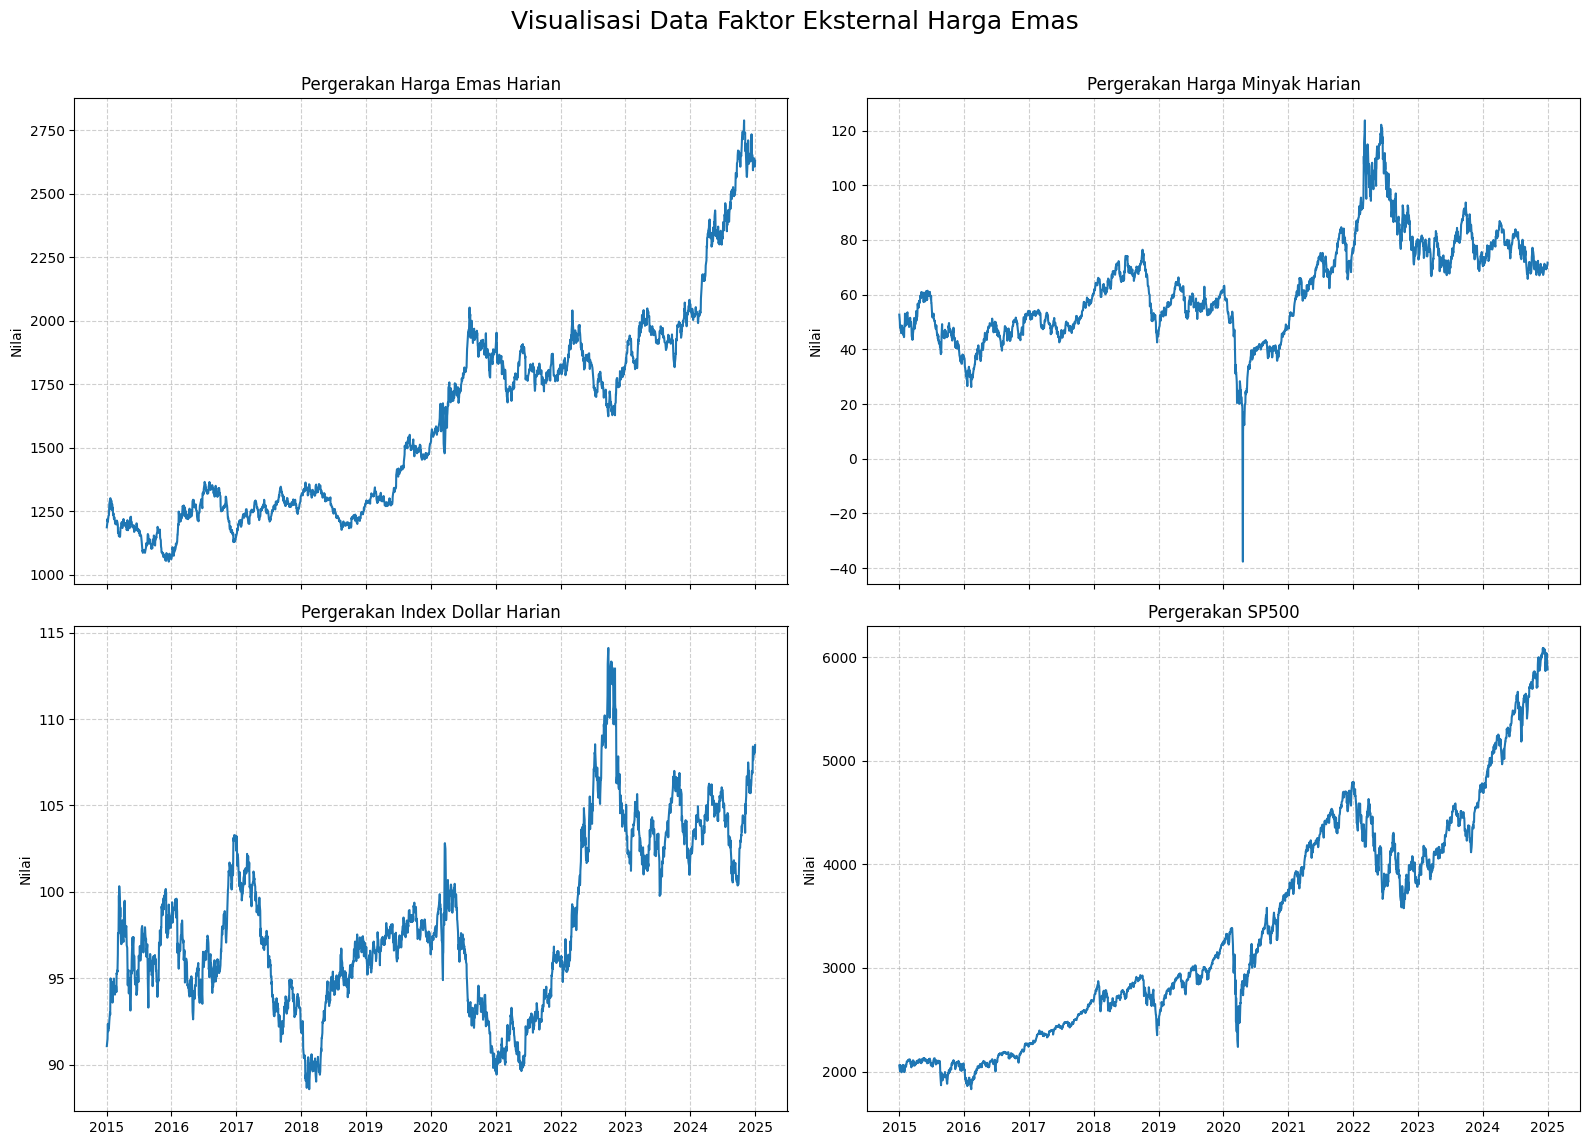

In [16]:
import matplotlib.pyplot as plt

final_df = df

final_df.dropna(inplace=True)
final_df.index.name = 'Date'

# --- 2. Proses Plotting Data ---
columns_to_plot = final_df.columns
num_plots = len(columns_to_plot)
nrows = (num_plots + 1) // 2
ncols = 2

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(16, 12), sharex=True)
axes = axes.flatten()

for i, col in enumerate(columns_to_plot):
    ax = axes[i]
    ax.plot(final_df.index, final_df[col], label=col)
    ax.set_title(f'Pergerakan {col}', fontsize=12)
    ax.set_ylabel('Nilai')
    ax.grid(True, linestyle='--', alpha=0.6)

for j in range(num_plots, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Visualisasi Data Faktor Eksternal Harga Emas', fontsize=18)
fig.tight_layout(rect=[0, 0.03, 1, 0.97])

# Menyimpan plot ke dalam file
plt.savefig('visualisasi_data_keuangan.png')


## Korelasi Faktor Eksternal Dengan Harga Emas

Membuat scatter plot untuk setiap variabel x terhadap y...
Membuat heatmap korelasi...


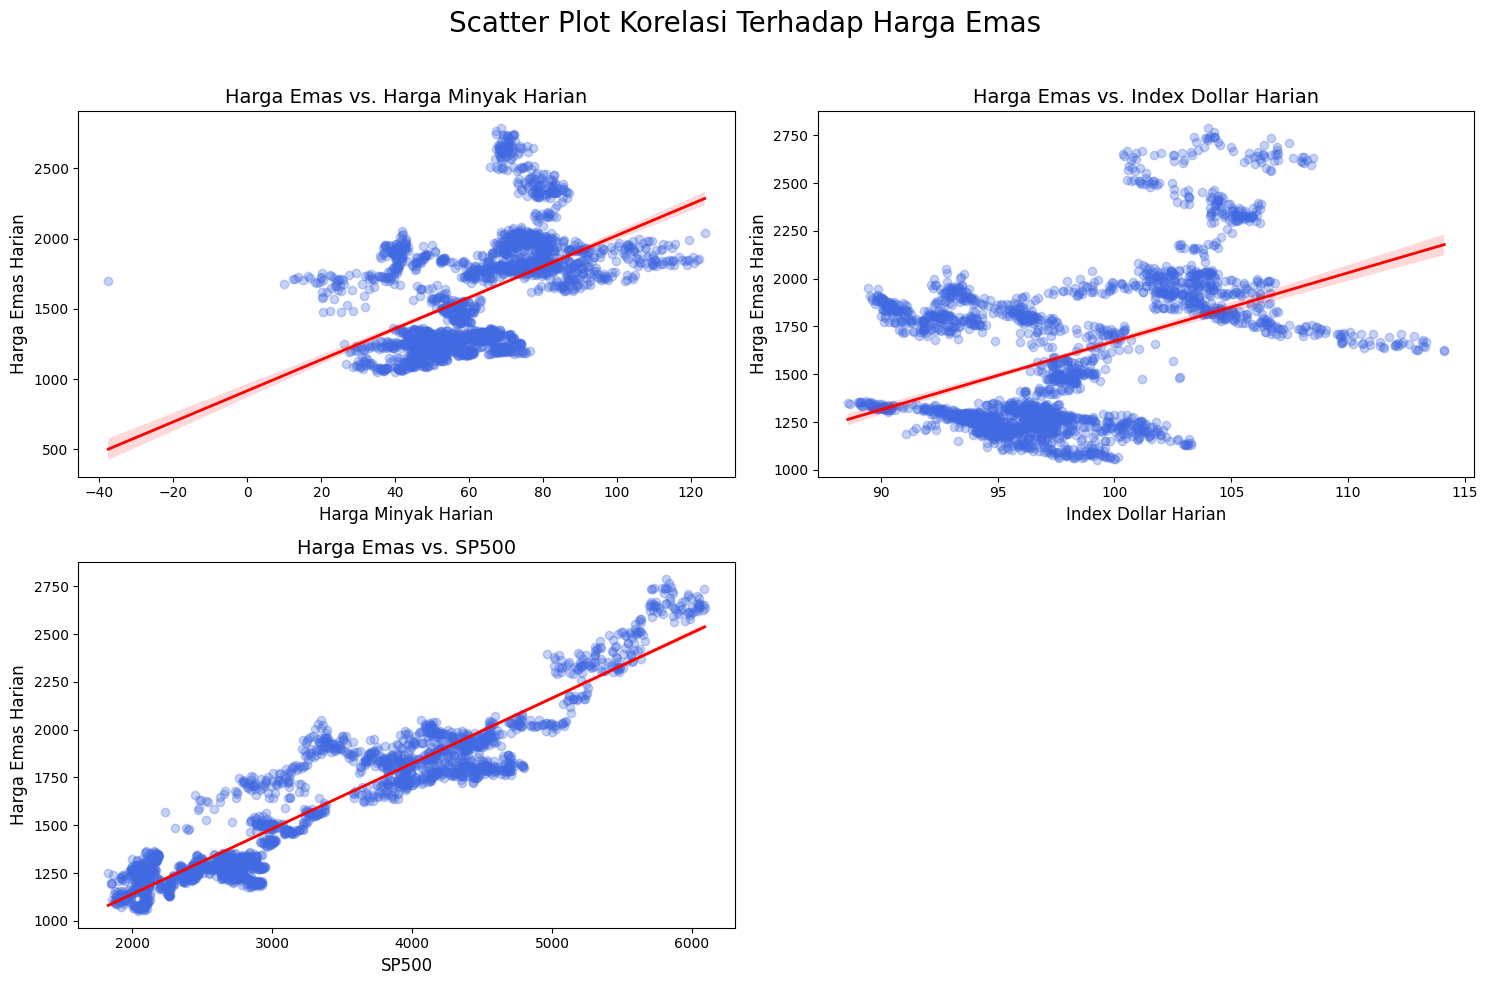

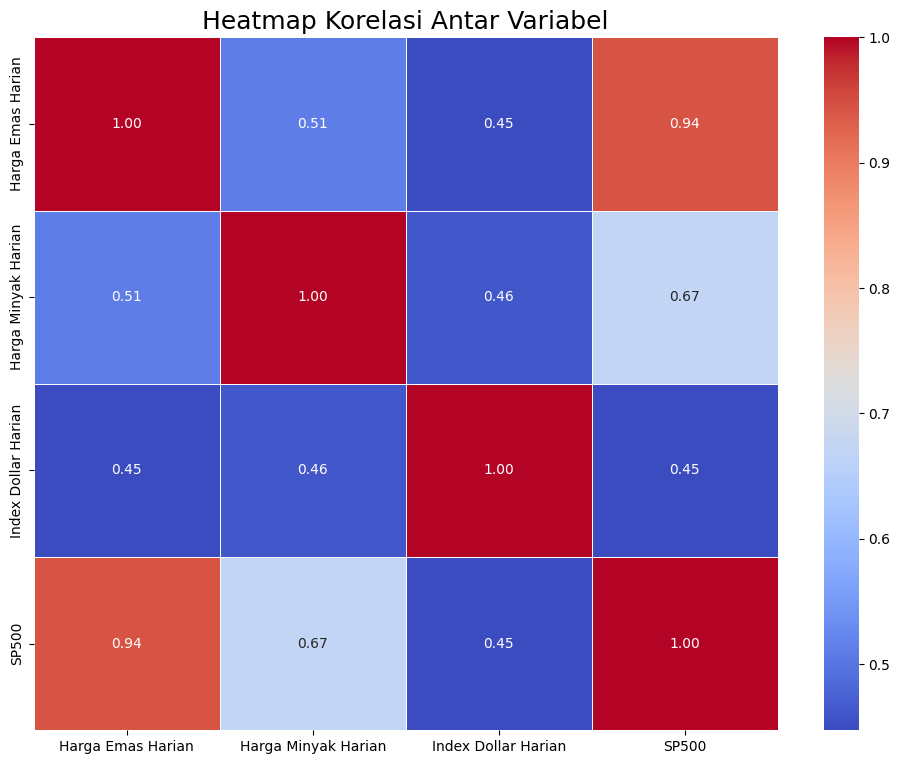

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

final_df = df

final_df.dropna(inplace=True)

# --- Bagian 2: Membuat Scatter Plot 📊 ---
y_var = 'Harga Emas Harian'
x_vars = [col for col in final_df.columns if col != y_var]

# Menentukan layout subplot
n_cols = 2
n_rows = (len(x_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
axes = axes.flatten()

# Looping untuk membuat plot untuk setiap variabel x
for i, x_var in enumerate(x_vars):
    # Menggunakan regplot dari seaborn untuk menampilkan garis regresi
    sns.regplot(data=final_df, x=x_var, y=y_var, ax=axes[i],
                scatter_kws={'alpha': 0.3, 'color': 'royalblue'},
                line_kws={'color': 'red', 'linewidth': 2})
    axes[i].set_title(f'Harga Emas vs. {x_var}', fontsize=14)
    axes[i].set_xlabel(x_var, fontsize=12)
    axes[i].set_ylabel(y_var, fontsize=12)

# Sembunyikan subplot yang tidak digunakan
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

fig.suptitle('Scatter Plot Korelasi Terhadap Harga Emas', fontsize=20)
fig.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('scatter_plots_korelasi.png')


# --- Bagian 3: Membuat Heatmap Korelasi 🔥 ---
# Hitung matriks korelasi
corr_matrix = final_df.corr()

# Buat plot heatmap
plt.figure(figsize=(12, 9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Heatmap Korelasi Antar Variabel', fontsize=18)
plt.savefig('heatmap_korelasi.png')
